In [63]:
import pandas as pd
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

train = pd.read_csv("D:/Python_Projects/Classification/TravelInsurancePrediction_Train.csv")
test = pd.read_csv("D:/Python_Projects/Classification/TravelInsurancePrediction_Test.csv")

train.head()

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,PreviouslyInsured,TravelInsurance
0,406,28,Private Sector/Self Employed,Yes,1200000,9,0,No,No,1,1
1,407,25,Private Sector/Self Employed,No,1700000,6,0,Yes,No,1,1
2,408,31,Government Sector,No,350000,2,0,No,No,1,0
3,409,28,Private Sector/Self Employed,Yes,700000,5,0,No,No,1,0
4,410,28,Private Sector/Self Employed,No,550000,4,0,No,No,1,0


In [33]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
train.isnull().sum() #check the null cells

ID                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
PreviouslyInsured      0
TravelInsurance        0
dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1581 non-null   int64 
 1   Age                  1581 non-null   int64 
 2   Employment Type      1581 non-null   object
 3   GraduateOrNot        1581 non-null   object
 4   AnnualIncome         1581 non-null   int64 
 5   FamilyMembers        1581 non-null   int64 
 6   ChronicDiseases      1581 non-null   int64 
 7   FrequentFlyer        1581 non-null   object
 8   EverTravelledAbroad  1581 non-null   object
 9   PreviouslyInsured    1581 non-null   int64 
 10  TravelInsurance      1581 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 136.0+ KB


In [38]:
# Change the value in `FrequentFlyer`, 'GraduateOrNot', 'EverTravelledAbroad' as described - `No` to 0, `Yes` to 1.
import pandas as pd
train = pd.read_csv("D:/Python_Projects/Classification/TravelInsurancePrediction_Train.csv")

train['GraduateOrNot'] = train['GraduateOrNot'].replace({'No' : 0, 'Yes': 1})

train['EverTravelledAbroad'] = train['EverTravelledAbroad'].replace({'No' : 0, 'Yes': 1})

train['FrequentFlyer'] = train['FrequentFlyer'].replace({'No' : 0, 'Yes': 1})

In [39]:
train.head()

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,PreviouslyInsured,TravelInsurance
0,406,28,Private Sector/Self Employed,1,1200000,9,0,0,0,1,1
1,407,25,Private Sector/Self Employed,0,1700000,6,0,1,0,1,1
2,408,31,Government Sector,0,350000,2,0,0,0,1,0
3,409,28,Private Sector/Self Employed,1,700000,5,0,0,0,1,0
4,410,28,Private Sector/Self Employed,0,550000,4,0,0,0,1,0


In [40]:
from sklearn.preprocessing import StandardScaler, RobustScaler

ss = StandardScaler()
num_feat = ['Age', 'AnnualIncome']
transform_data = ss.fit_transform(train[num_feat])

<AxesSubplot: xlabel='AnnualIncome', ylabel='Count'>

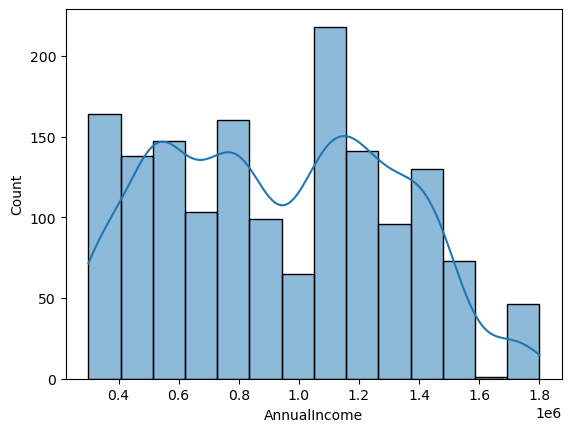

In [41]:
import seaborn as sns

sns.histplot(train['AnnualIncome'], kde=True)

<AxesSubplot: ylabel='Count'>

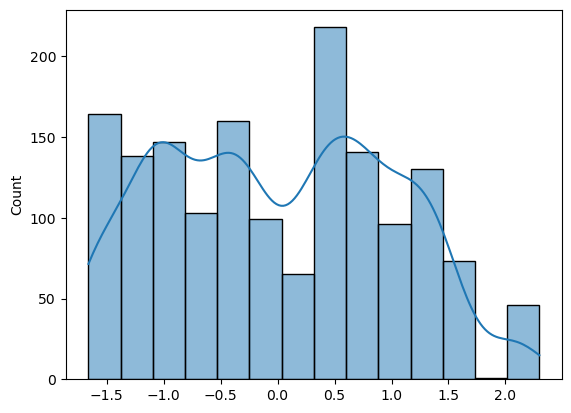

In [42]:
sns.histplot(transform_data[:, 1], kde=True)

In [43]:
import numpy as np

train_numeric = train.select_dtypes(include=[np.number]) # Save only numeric values
numeric_columns = train_numeric.columns.values
numeric_columns

array(['ID', 'Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'PreviouslyInsured', 'TravelInsurance'], dtype=object)

In [44]:
from sklearn.model_selection import train_test_split

x = train[numeric_columns]
y = train['TravelInsurance']
del x['TravelInsurance']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, random_state=30, train_size=0.8, stratify=y, shuffle=True
)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import ConfusionMatrixDisplay

In [77]:
# KNN

knn_baseline = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_baseline.fit(x_train, y_train)

y_train_predicted_knn = knn_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn_baseline.predict_proba(x_val)[:, 1]

roc_knn_train = roc_auc_score(y_train, y_train_predicted_knn)
roc_knn_val = roc_auc_score(y_val, y_val_predicted_knn)

print(f"ROC AUC train {roc_knn_train}")
print(f"ROC AUC val {roc_knn_val}")

ROC AUC train 0.895660988796248
ROC AUC val 0.7197951775991702


Text(0.5, 0, 'Predicted values')

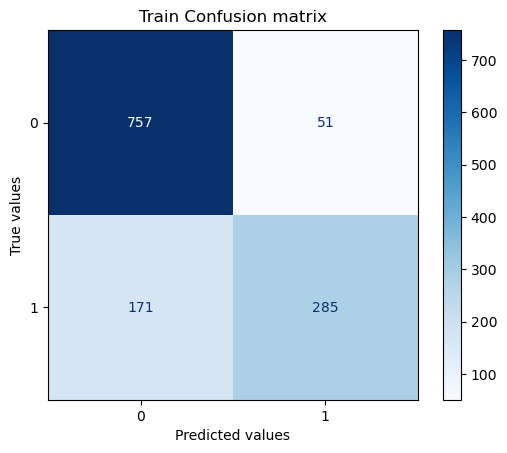

In [78]:
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Train Confusion matrix')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

Text(0.5, 0, 'Predicted values')

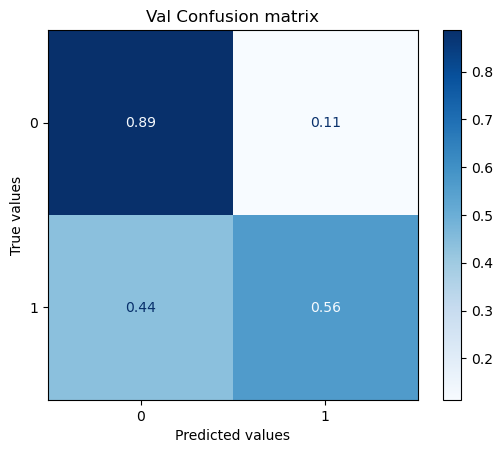

In [79]:
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_val,
    y_val,
    cmap=plt.cm.Blues,
    normalize='true',
)
display.ax_.set_title('Val Confusion matrix')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

In [88]:
# Logistic Regression

logit = LogisticRegression(
    n_jobs=-1, random_state=42, C=10, penalty='l2', solver='newton-cg'
)
logit.fit(x_train, y_train)

# C - inverse regularization value, the higher, the training data has more weight, i.e. well reflect the real world
# penalty - regularization type
# solver - optimization algorithm

y_train_predicted_lr = logit.predict_proba(x_train)[:, 1]
y_val_predicted_lr = logit.predict_proba(x_val)[:, 1]

roc_lr_train = roc_auc_score(y_train, y_train_predicted_lr)
roc_lr_val = roc_auc_score(y_val, y_val_predicted_lr)

print(f"ROC AUC train {roc_lr_train}")
print(f"ROC AUC val {roc_lr_val}")

ROC AUC train 0.7614860170227549
ROC AUC val 0.8035606257021864


In [ ]:
# Support Vector Machine

In [100]:
svc_baseline = SVC(max_iter=40, probability=True)
svc_baseline.fit(x_train, y_train)

y_train_predicted_svc = svc_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_svc = svc_baseline.predict_proba(x_val)[:, 1]

roc_svc_train = roc_auc_score(y_train, y_train_predicted_svc)
roc_svc_val = roc_auc_score(y_val, y_val_predicted_svc)

print(f"ROC AUC train {roc_svc_train}")
print(f"ROC AUC val {roc_svc_val}")

ROC AUC train 0.7438173093625151
ROC AUC val 0.7511451041396595
